Part I: EDA - Exploratory Data Analysis & Pre-processing

Data Import

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
#Loading data into dataframe
df = pd.read_csv("C:\\Users\\iykeo\\ml-project-unsupervised-learning\\Wholesale_Data.csv")

In [5]:
#Displaying first few rows
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Data Cleaning

In [8]:
# number of rows and columns in the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (440, 8)


In [11]:
# data types of each column
print(df.dtypes)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [12]:
# data info and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
#Checking for missing data
print(df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


Data Description

In [13]:
# Generate summary statistics
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Data Visualization: to helps us gain insights into the relationships, distributions, and patterns present in the data

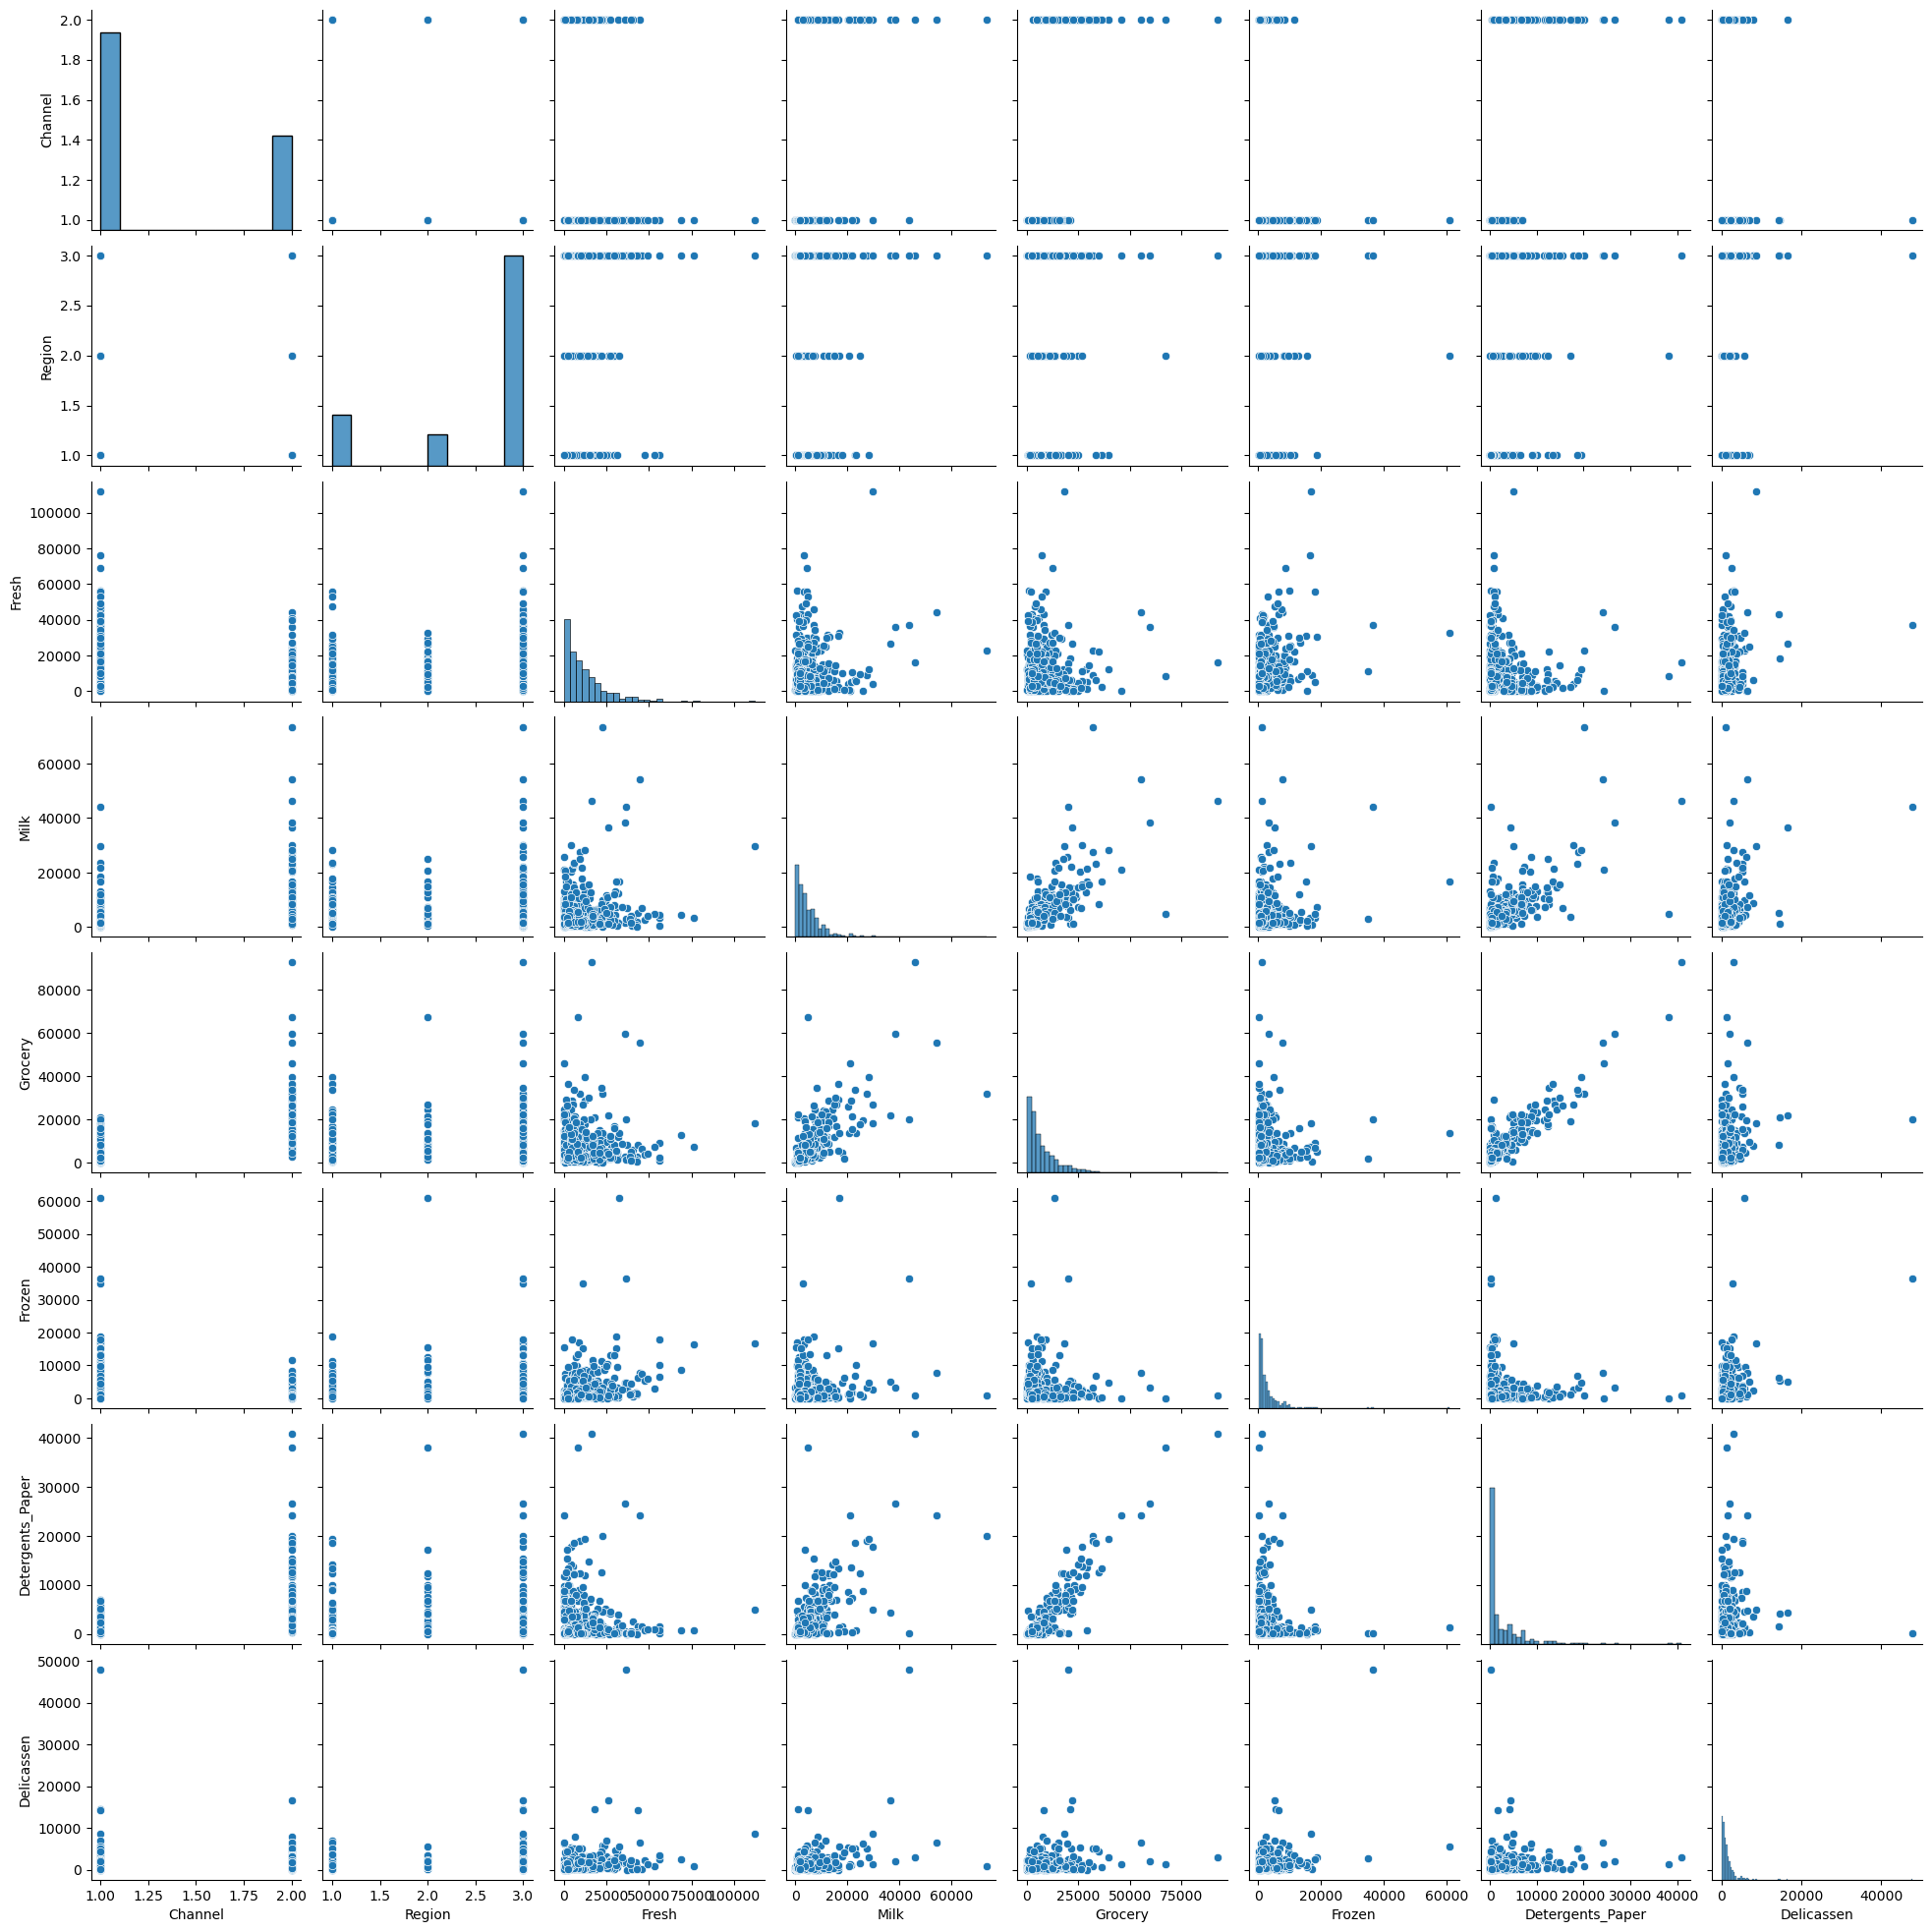

In [14]:
sns.pairplot(df)

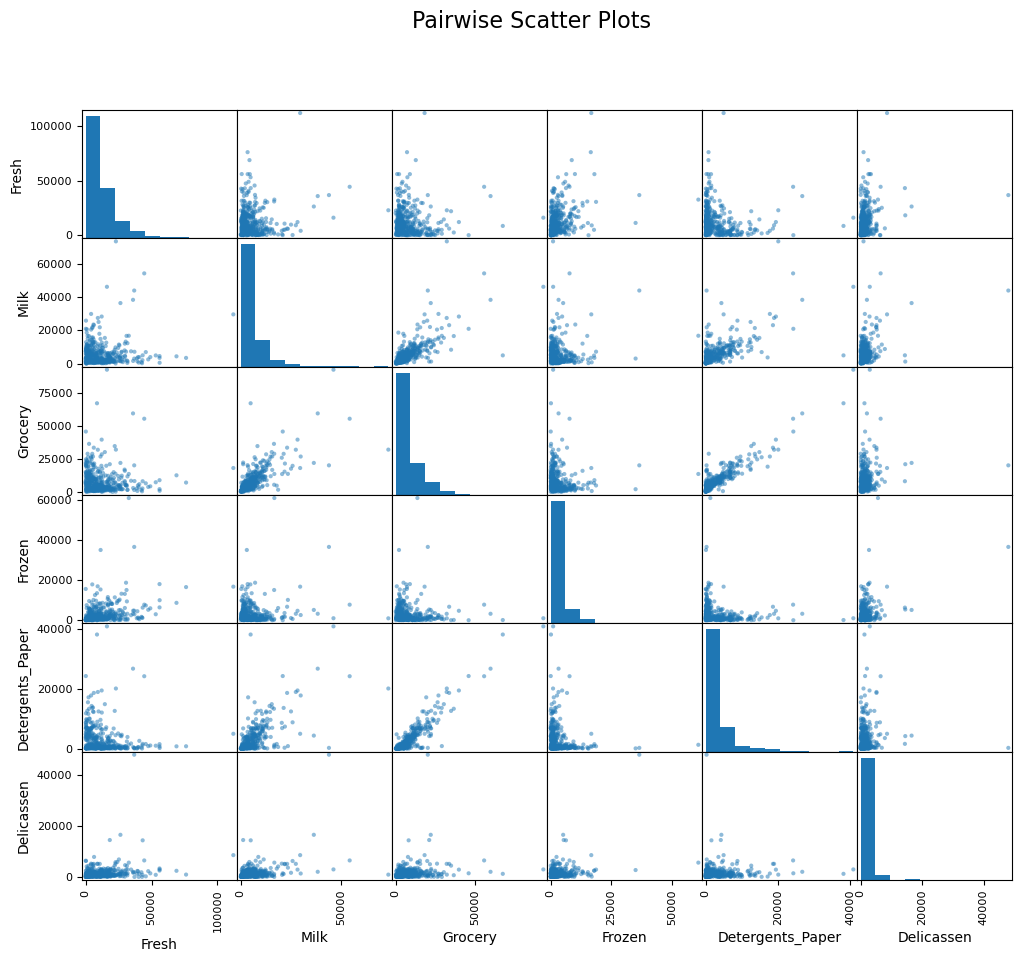

In [16]:

# Selecting only the numerical columns for scatter plots
numerical_columns = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

# Creating pairwise scatter plots
pd.plotting.scatter_matrix(df[numerical_columns], figsize=(12, 10))
plt.suptitle("Pairwise Scatter Plots", fontsize=16)
plt.show()


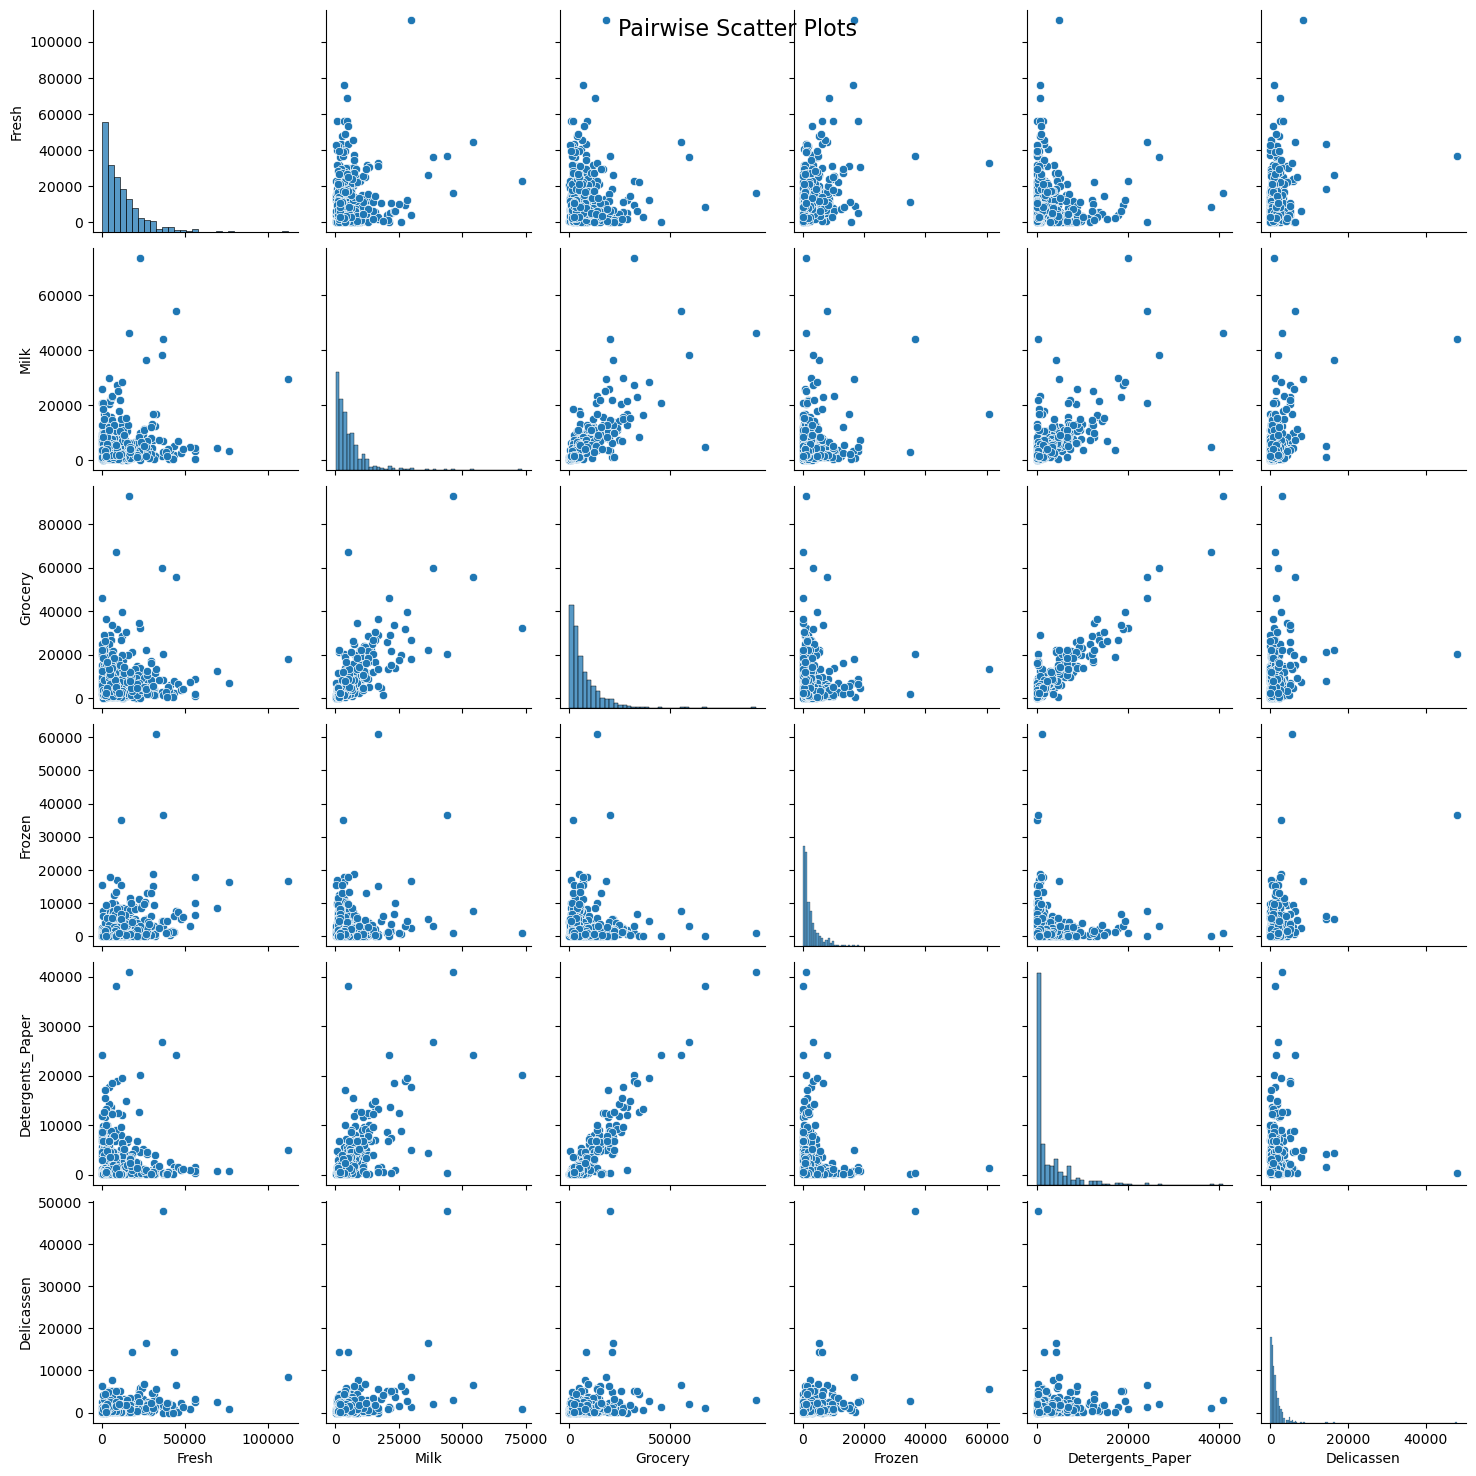

In [18]:
# Creating pairwise scatter plots using Seaborn
sns.pairplot(df[numerical_columns], height=2.5)
plt.suptitle("Pairwise Scatter Plots", fontsize=16)
plt.show()

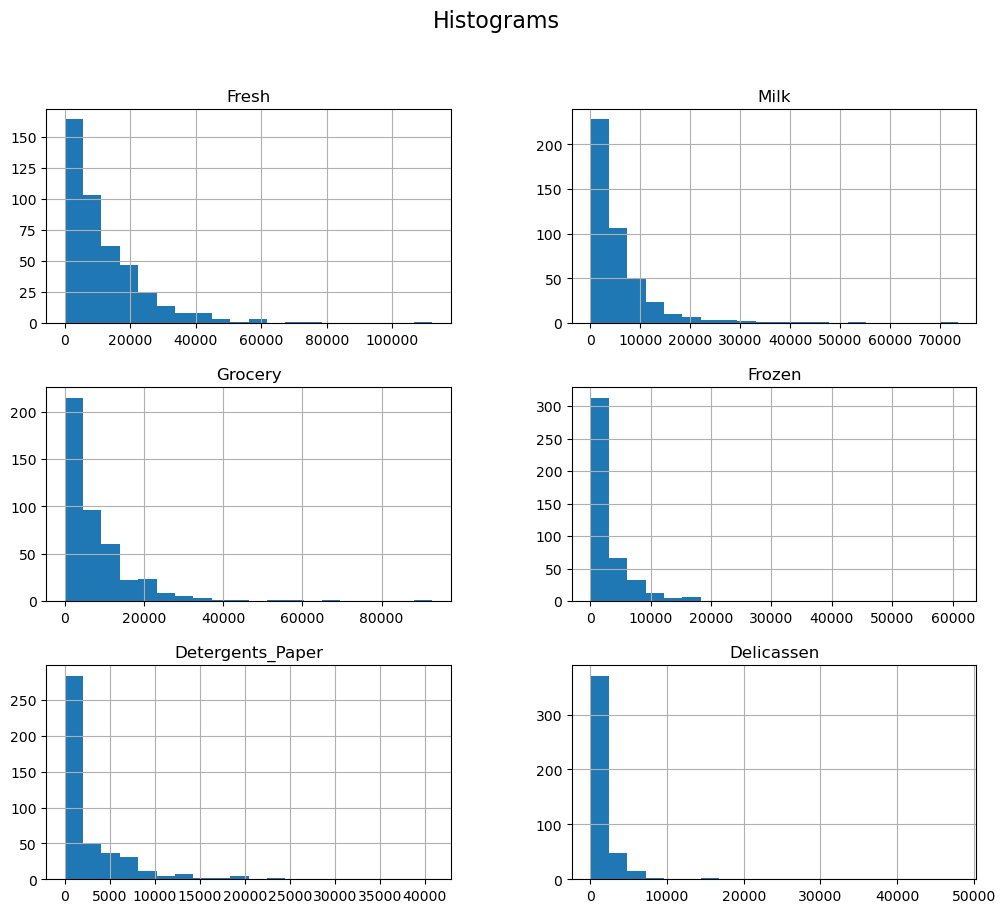

In [19]:
# Create histograms
df[numerical_columns].hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms", fontsize=16)
plt.show()

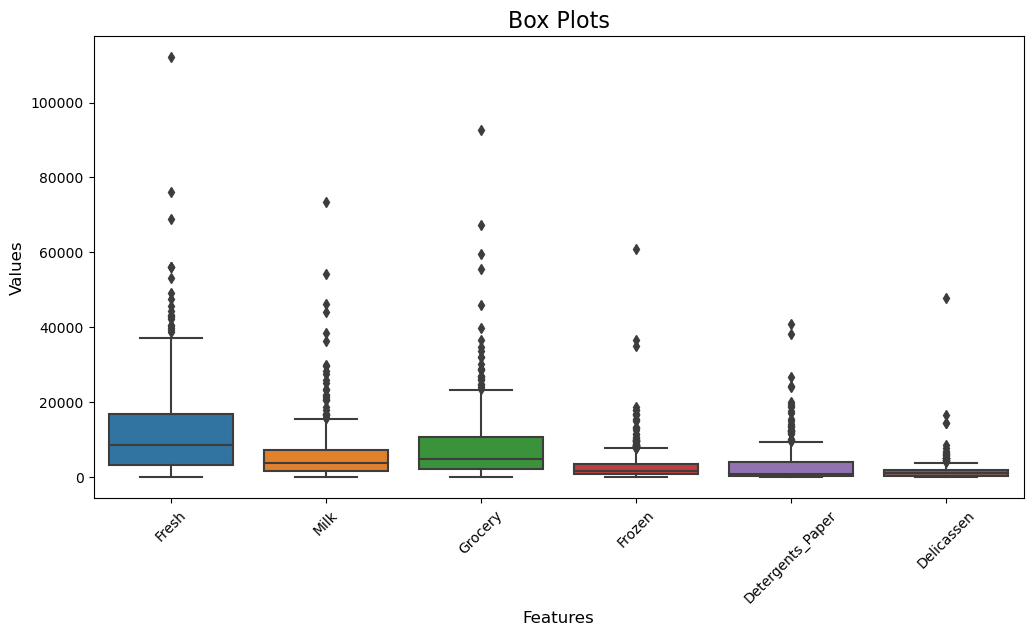

In [21]:
# Create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Box Plots", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45)
plt.show()

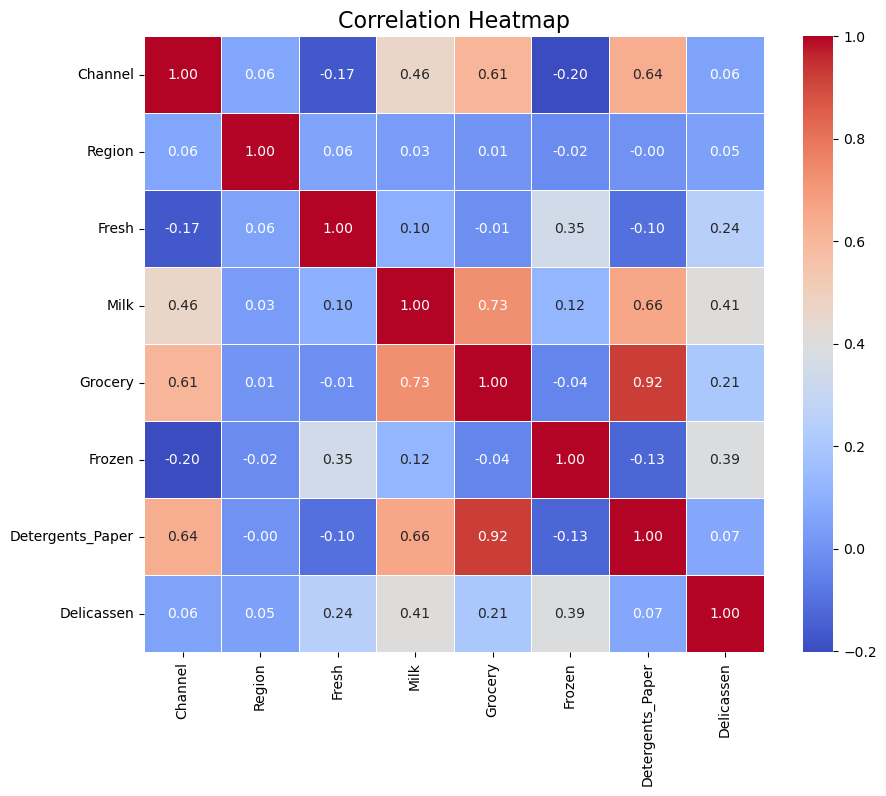

In [22]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

C:\Users\iykeo\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


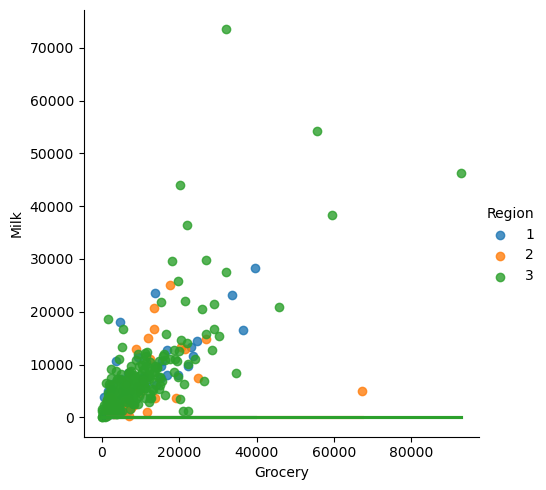

In [25]:
#Checking extent of correlation
sns.lmplot(x="Grocery", y="Milk", hue="Region", data=df, logistic=True)
plt.show()

C:\Users\iykeo\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


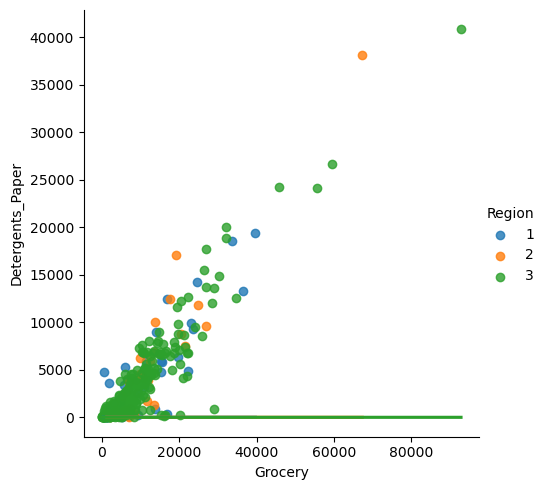

In [27]:
#Checking extent of correlation
sns.lmplot(x="Grocery", y="Detergents_Paper", hue="Region", data=df, logistic=True)
plt.show()

C:\Users\iykeo\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


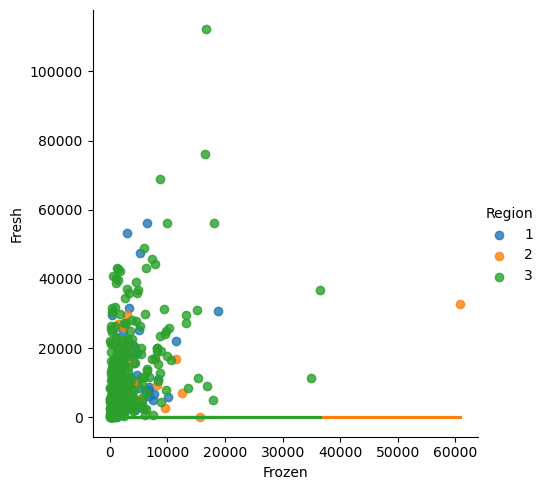

In [28]:
#Checking extent of correlation
sns.lmplot(x="Frozen", y="Fresh", hue="Region", data=df, logistic=True)
plt.show()

C:\Users\iykeo\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


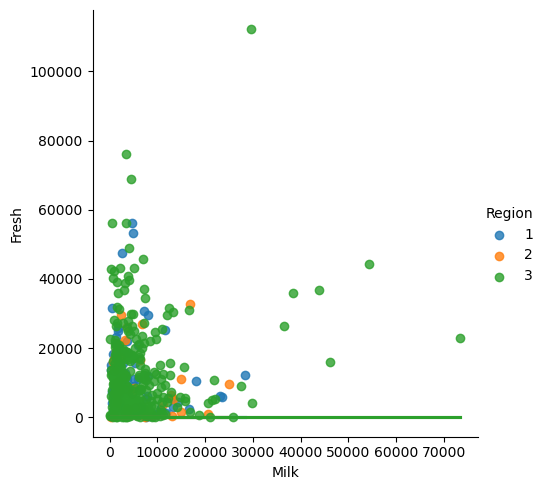

In [30]:
#Checking extent of correlation
sns.lmplot(x="Milk", y="Fresh", hue="Region", data=df, logistic=True)
plt.show()

Outlier Detection

In [29]:
# Z-Score method for outlier detection
z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())
outliers = z_scores > 3

# Count the number of outliers in each column
num_outliers = outliers.sum()

print("Number of outliers in each column:")
print(num_outliers)

Number of outliers in each column:
Fresh                7
Milk                 9
Grocery              7
Frozen               6
Detergents_Paper    10
Delicassen           4
dtype: int64


I personally think the outliers are valid and should be taken care of by robust statistical approach:Instead of removing outliers, you can use robust metrics and visualizations that are not influenced by extreme values. For example, instead of the mean, you can use the median, or you can use percentile-based approaches.

Correlation Analysis

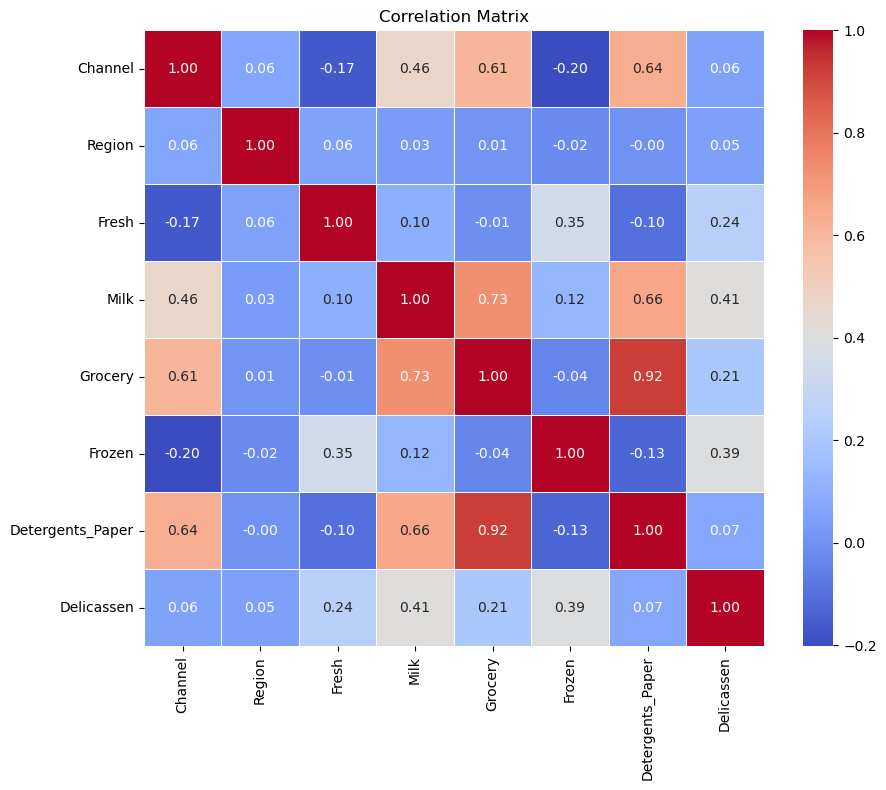

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [32]:
#Calculating the correlation between "Grocery" and "Milk"

correlation_grocery_milk = df['Grocery'].corr(df['Milk'])
print("Correlation between Grocery and Milk:", correlation_grocery_milk)

Correlation between Grocery and Milk: 0.7283351181536448


In [34]:
#Calculate the correlation between "Grocery" and "Detergents_Paper"
correlation_grocery_detergents = df['Grocery'].corr(df['Detergents_Paper'])
print("Correlation between Grocery and Detergents_Paper:", correlation_grocery_detergents)


Correlation between Grocery and Detergents_Paper: 0.924640690854268


Correlation between Grocery and Milk: 0.728
Correlation between Grocery and Detergents_Paper: 0.925
The correlation coefficients indicate the following:

"Grocery" and "Milk" have a moderately strong positive correlation of approximately 0.728. This means that there is a tendency for the "Grocery" and "Milk" spending to increase together. In other words, when customers spend more on groceries, they also tend to spend more on milk (and vice versa) to some extent.

"Grocery" and "Detergents_Paper" have a very strong positive correlation of approximately 0.925. This indicates a significant linear relationship between these two variables. When customers spend more on groceries, they also tend to spend more on detergents and paper products (and vice versa) to a high degree.

It's important to note that correlation does not imply causation. Just because two variables are correlated, it does not mean that one causes the other. There could be other underlying factors or external influences affecting the observed relationship.

Data Transformation

In [35]:
#Separating the features to be transformed from the dataset
features = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]


In [37]:
#Using the Z-score transformation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)


In [38]:
#Converting the standardized_feature array to data frame
standardized_data = pd.DataFrame(standardized_features, columns=features.columns)


In [39]:
standardized_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


By using the z-scores, we achieve a form of robustness against the influence of outliers because the mean and standard deviation are affected by outliers, which results in the z-scores being less influenced by extreme values

Feature Selection

PCA feature selection

In [43]:
standardized_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [45]:
# Make a copy of the DataFrame
standardized_df = standardized_data.copy()

In [46]:
standardized_df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151


In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [48]:
# Perform PCA with n_components=None to retain all components
pca = PCA(n_components=None)
principal_components = pca.fit_transform(standardized_df)

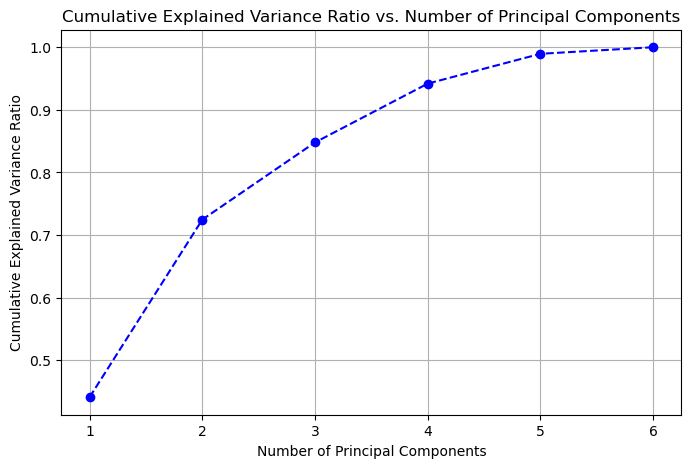

In [49]:
#Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
num_components = len(explained_variance_ratio)
component_numbers = np.arange(1, num_components + 1)

plt.figure(figsize=(8, 5))
plt.plot(component_numbers, np.cumsum(explained_variance_ratio), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()


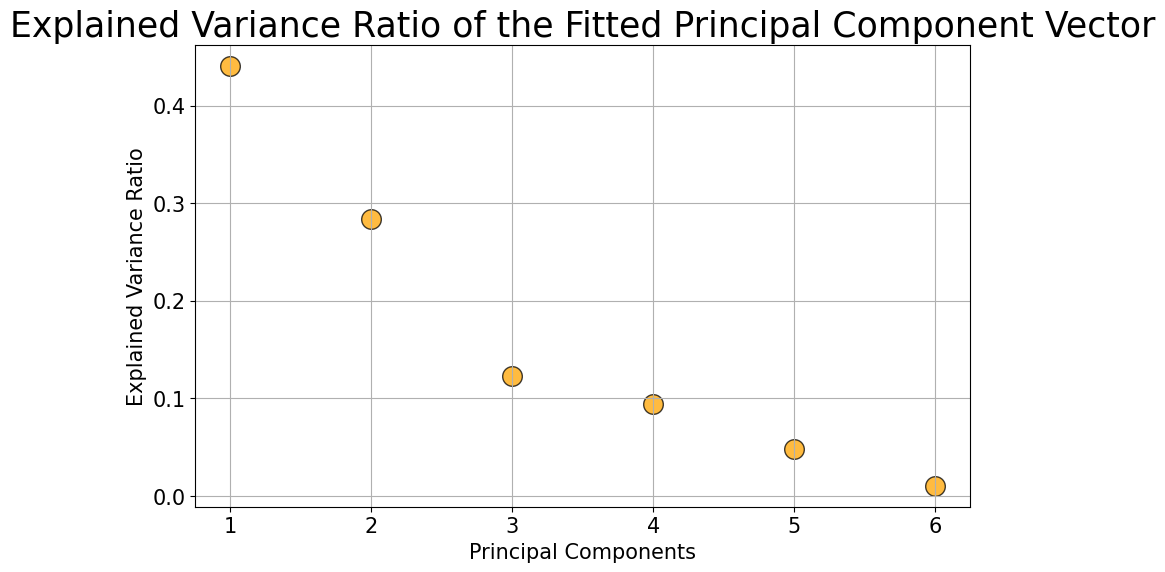

In [50]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.scatter(x=[i + 1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
            s=200, alpha=0.75, c='orange', edgecolor='k')
plt.grid(True)
plt.title("Explained Variance Ratio of the Fitted Principal Component Vector", fontsize=25)
plt.xlabel("Principal Components", fontsize=15)
plt.xticks([i + 1 for i in range(len(pca.explained_variance_ratio_))], fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained Variance Ratio", fontsize=15)
plt.show()

In [51]:
pca.explained_variance_ratio_


array([0.44082893, 0.283764  , 0.12334413, 0.09395504, 0.04761272,
       0.01049519])


The first principal component (PC1) explains approximately 44.08% of the total variance in the data.
The second principal component (PC2) explains approximately 28.38% of the total variance.
The third principal component (PC3) explains approximately 12.33% of the total variance.
The fourth principal component (PC4) explains approximately 9.40% of the total variance.
The fifth principal component (PC5) explains approximately 4.76% of the total variance.
The sixth principal component (PC6) explains approximately 1.05% of the total variance.
These values represent the percentage of the total variance captured by each principal component. It is common to sort the principal components in descending order of explained variance ratio, as the first few components often capture the most significant variability in the data. This allows us to reduce the dimensionality while retaining most of the important information in the data. In this case, the first two principal components (PC1 and PC2) are the most significant ones, as they explain a total of approximately 72.47% (44.08% + 28.38%) of the total variance.

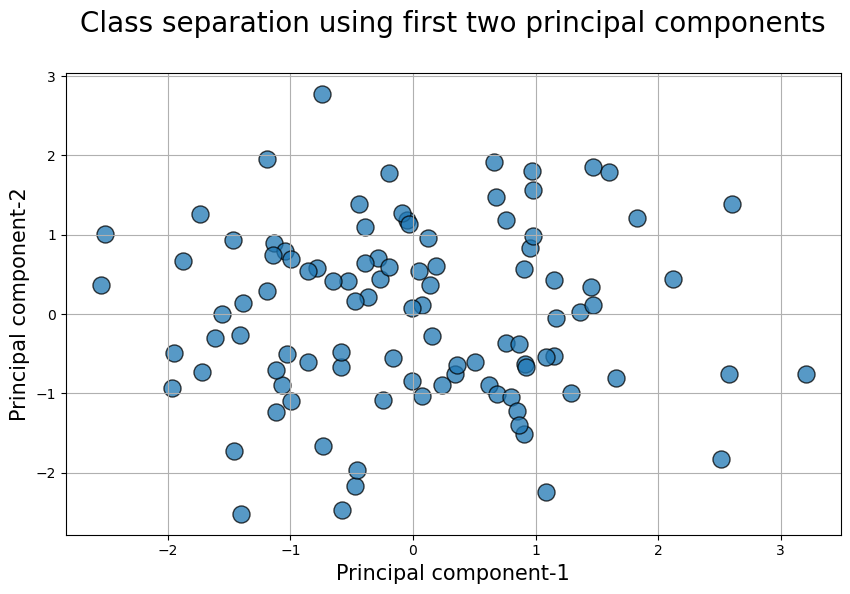

In [58]:
# Assuming 'standardized_df' is the DataFrame containing the standardized data
dfx_trans = pca.transform(standardized_df)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10, 6))
plt.scatter(dfx_trans[0], dfx_trans[1], edgecolors='k', alpha=0.75, s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n", fontsize=20)
plt.xlabel("Principal component-1", fontsize=15)
plt.ylabel("Principal component-2", fontsize=15)
plt.show()


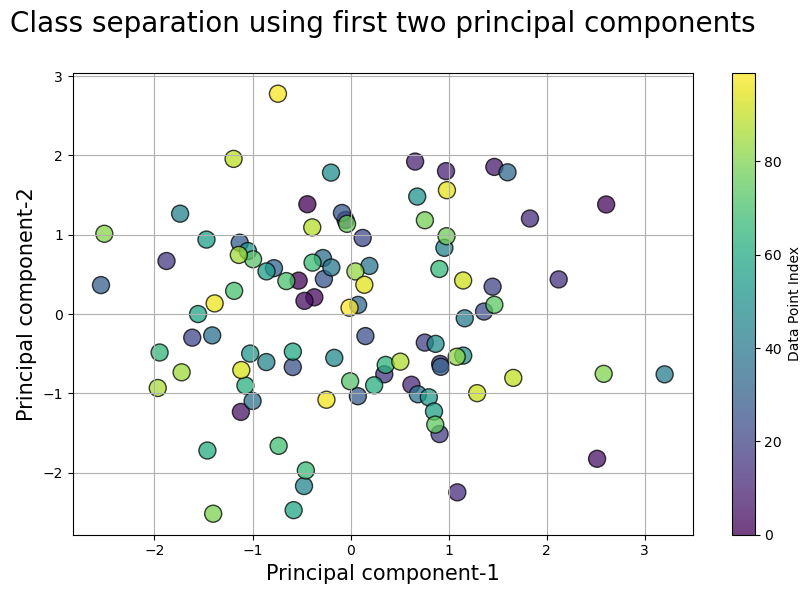

In [56]:


# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dfx_trans[0], dfx_trans[1], c=dfx_trans.index, cmap='viridis', edgecolors='k', alpha=0.75, s=150)
plt.colorbar(label='Data Point Index')
plt.grid(True)
plt.title("Class separation using first two principal components\n", fontsize=20)
plt.xlabel("Principal component-1", fontsize=15)
plt.ylabel("Principal component-2", fontsize=15)
plt.show()


Part II - KMeans Clustering

C:\Users\iykeo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iykeo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iykeo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iykeo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

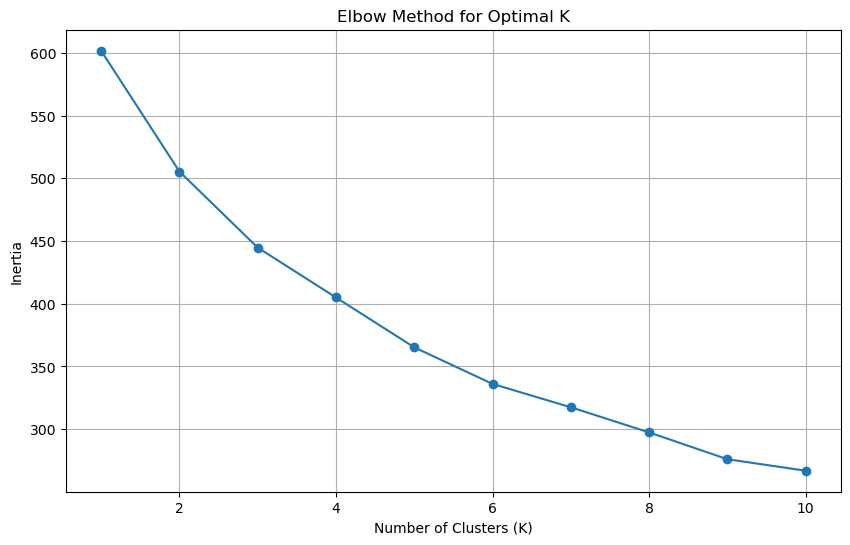

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Pre-process the data (already done, using standardized_df)

# Step 2: Determining the Optimal Number of Clusters (Elbow Method)

# Create an empty list to store the inertia (sum of squared distances to the closest centroid)
inertia = []

# Try different values of K (number of clusters) from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to determine the optimal K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


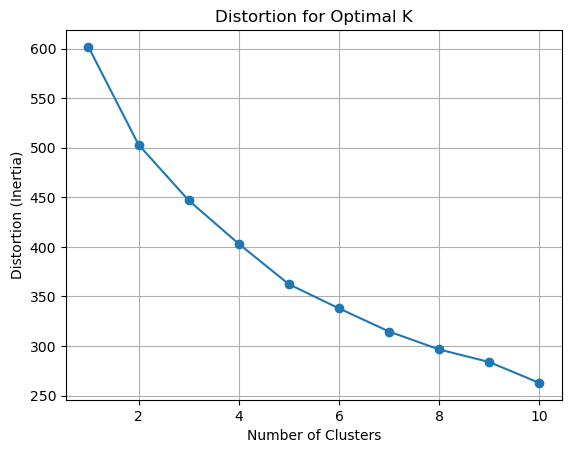

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_distortion(X, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion (Inertia)')
    plt.title('Distortion for Optimal K')
    plt.grid(True)
    plt.show()

# Assuming 'standardized_df' is the DataFrame containing the standardized data
plot_distortion(standardized_df, max_clusters=10)


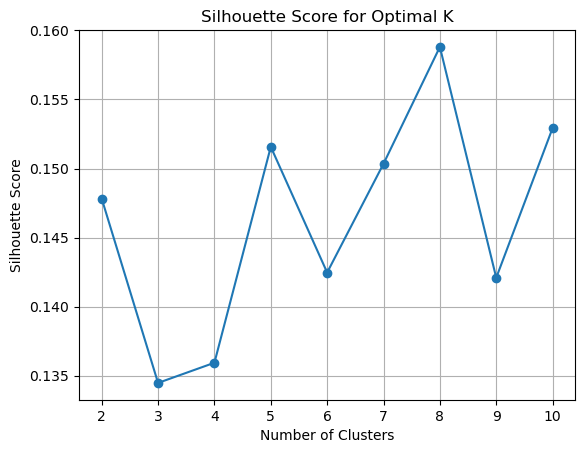

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def plot_silhouette_scores(X, max_clusters=10):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
        km.fit(X)
        silhouette_scores.append(silhouette_score(X, km.labels_))

    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal K')
    plt.grid(True)
    plt.show()

# Assuming 'standardized_df' is the DataFrame containing the standardized data
plot_silhouette_scores(standardized_df, max_clusters=10)


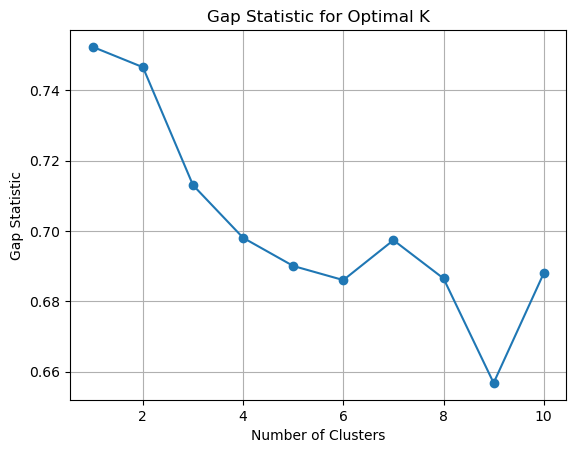

In [69]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def generate_reference_data(X):
    """
    Generate a reference dataset by creating random uniform data within the range of each feature of the original data.
    """
    num_samples, num_features = X.shape
    reference_data = np.zeros_like(X)
    for feature in range(num_features):
        min_val = np.min(X[:, feature])
        max_val = np.max(X[:, feature])
        reference_data[:, feature] = np.random.uniform(min_val, max_val, size=num_samples)
    return reference_data

def compute_gap_statistic(X, num_clusters, num_reference_datasets=10):
    """
    Compute the gap statistic for K-means clustering.

    Parameters:
        X: numpy array, shape (n_samples, n_features)
            The original data as a NumPy array.
        num_clusters: int
            The number of clusters to evaluate.
        num_reference_datasets: int, optional (default=10)
            The number of reference datasets to generate.

    Returns:
        gap_statistic: float
            The gap statistic value.
    """
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)

    within_dispersion = kmeans.inertia_

    gap_values = []
    for _ in range(num_reference_datasets):
        reference_data = generate_reference_data(X)
        kmeans_ref = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, random_state=0)
        kmeans_ref.fit(reference_data)
        within_dispersion_ref = kmeans_ref.inertia_
        gap_values.append(np.log(within_dispersion_ref) - np.log(within_dispersion))

    gap_statistic = np.mean(gap_values)
    return gap_statistic

def plot_gap_statistics(X, max_clusters=10, num_reference_datasets=10):
    gap_statistics = []
    for i in range(1, max_clusters + 1):
        gap_statistics.append(compute_gap_statistic(X, num_clusters=i, num_reference_datasets=num_reference_datasets))

    plt.plot(range(1, max_clusters + 1), gap_statistics, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Gap Statistic')
    plt.title('Gap Statistic for Optimal K')
    plt.grid(True)
    plt.show()

# Assuming 'standardized_df' is the DataFrame containing the standardized data
# Convert DataFrame to NumPy array
X = standardized_df.values
plot_gap_statistics(X, max_clusters=10, num_reference_datasets=10)



Initianalize centroid

In [97]:
import numpy as np
import pandas as pd

# Assuming 'standardized_df' is the DataFrame containing the standardized data
num_clusters = 5

# Step 1: Select the first K data points as the initial centroids
initial_centroids = standardized_df.iloc[:num_clusters, :].values

print("Initial Centroids:")
print(initial_centroids)


Initial Centroids:
[[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
   3.        ]
 [-2.42667924 -0.42891263  1.26593626 -0.8667404  -0.67888615 -0.09470897
   3.        ]
 [ 1.49138963 -0.638902   -0.44398196 -0.43435128  2.20593008  2.18678609
   2.        ]
 [ 1.0040539   0.3861864   0.73736858  1.49073203 -0.93583387  1.17582904
   5.        ]
 [-1.25388067 -0.6377515   0.9071052  -1.4286807  -0.14006872 -0.8617549
   1.        ]]


Assign dat points

In [98]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def assign_to_clusters(data, centroids):
    num_data_points = data.shape[0]
    num_clusters = centroids.shape[0]
    cluster_labels = np.zeros(num_data_points, dtype=int)
    
    for i in range(num_data_points):
        min_distance = float('inf')
        for j in range(num_clusters):
            distance = euclidean_distance(data[i], centroids[j])
            if distance < min_distance:
                min_distance = distance
                cluster_labels[i] = j
                
    return cluster_labels

# Assuming 'standardized_df' is the DataFrame containing the standardized data
# 'initial_centroids' is the array containing the current centroids
cluster_labels = assign_to_clusters(standardized_df.values, initial_centroids)

# Add the cluster labels to the 'standardized_df' DataFrame
standardized_df['Cluster'] = cluster_labels


update the centroids, and repeat until convergence.

In [99]:
def update_centroids(data, cluster_labels, num_clusters):
    centroids = np.zeros((num_clusters, data.shape[1]))
    for i in range(num_clusters):
        cluster_indices = np.where(cluster_labels == i)[0]
        if len(cluster_indices) > 0:
            centroids[i] = np.mean(data[cluster_indices], axis=0)
    return centroids

# Assuming 'standardized_df' is the DataFrame containing the standardized data
# 'initial_centroids' is the array containing the initial centroids
# 'num_clusters' is the number of clusters
centroids = np.copy(initial_centroids)

converged = False
max_iterations = 100  # Maximum number of iterations
current_iteration = 0

while not converged and current_iteration < max_iterations:
    cluster_labels = assign_to_clusters(standardized_df.values, centroids)
    new_centroids = update_centroids(standardized_df.values, cluster_labels, num_clusters)
    
    if np.allclose(new_centroids, centroids):
        converged = True
    
    centroids = new_centroids
    current_iteration += 1

print("Converged after", current_iteration, "iterations.")


Converged after 7 iterations.


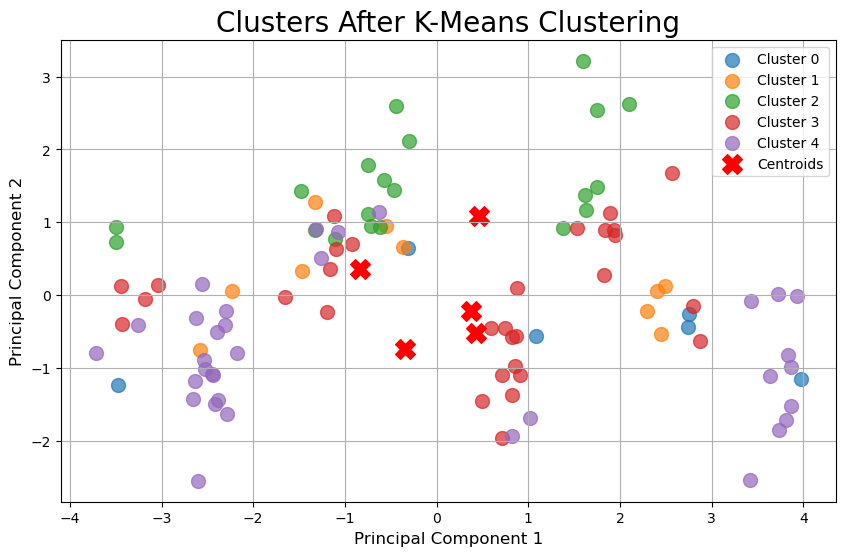

In [101]:

# Assuming 'standardized_df' is the DataFrame containing the standardized data
# 'centroids' is the array containing the final centroids
# 'num_clusters' is the number of clusters

# Step 1: Assign data points to clusters (in case it hasn't been done already)
cluster_labels = assign_to_clusters(standardized_df.values, centroids)

# Step 2: Add the 'Cluster' column to the 'standardized_df' DataFrame
standardized_df['Cluster'] = cluster_labels

# Step 3: Visualize the clusters on the first two principal components
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_indices = np.where(standardized_df['Cluster'] == cluster)[0]
    if len(cluster_indices) > 0:
        plt.scatter(dfx_trans[cluster_indices, 0],
                    dfx_trans[cluster_indices, 1],
                    label=f'Cluster {cluster}', s=100, alpha=0.7)

# Plot the centroids as markers
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title("Clusters After K-Means Clustering", fontsize=20)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


Part III - Hierarchical Clustering

In [102]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'standardized_df' is the DataFrame containing the standardized data

# Calculate the distance matrix using Euclidean distance
distance_matrix = np.sqrt(np.sum((standardized_df.values[:, np.newaxis] - standardized_df.values) ** 2, axis=2))


In [103]:
#linkage matrix
# Perform hierarchical clustering using the linkage function
linkage_matrix = linkage(distance_matrix, method='ward')


C:\Users\iykeo\AppData\Local\Temp\ipykernel_45972\458621049.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


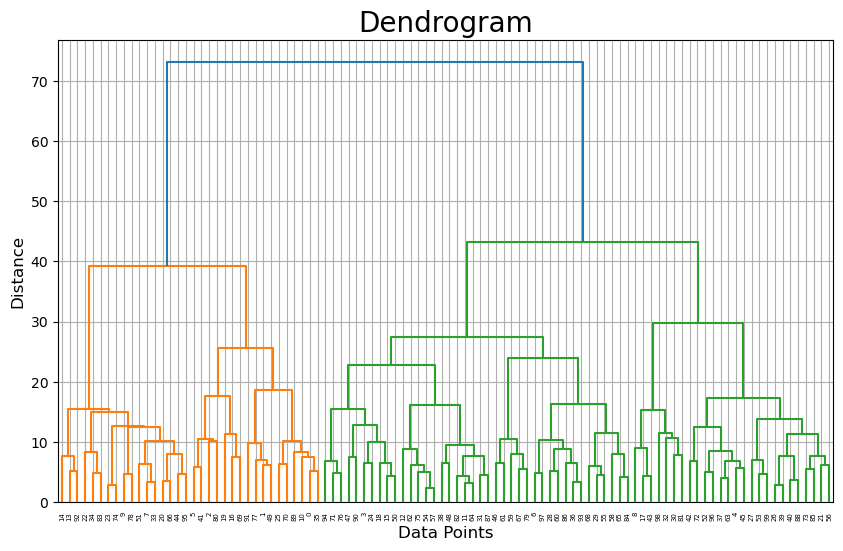

In [104]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram", fontsize=20)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.grid(True)
plt.show()


Using fcluster to get optimal number of clusters

C:\Users\iykeo\AppData\Local\Temp\ipykernel_45972\2786572385.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrices[method] = linkage(distance_matrix, method=method)


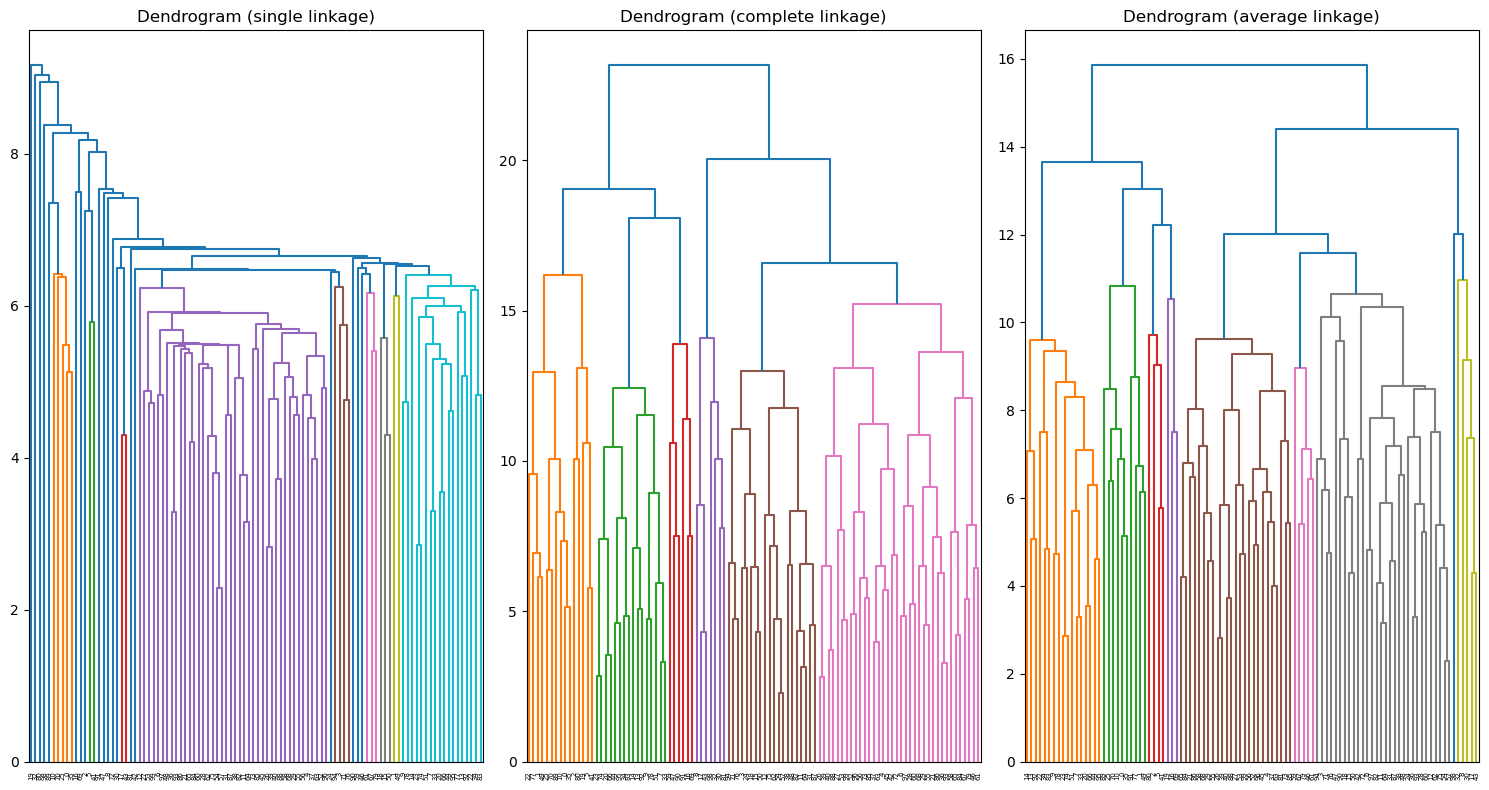

In [111]:

from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage matrix for different linkage methods
linkage_methods = ['single', 'complete', 'average']
linkage_matrices = {}
for method in linkage_methods:
    linkage_matrices[method] = linkage(distance_matrix, method=method)

# Plot the dendrograms for different linkage methods
plt.figure(figsize=(15, 8))
for idx, method in enumerate(linkage_methods):
    plt.subplot(1, len(linkage_methods), idx + 1)
    dendrogram(linkage_matrices[method])
    plt.title(f"Dendrogram ({method} linkage)", fontsize=12)
plt.tight_layout()
plt.show()



With 6


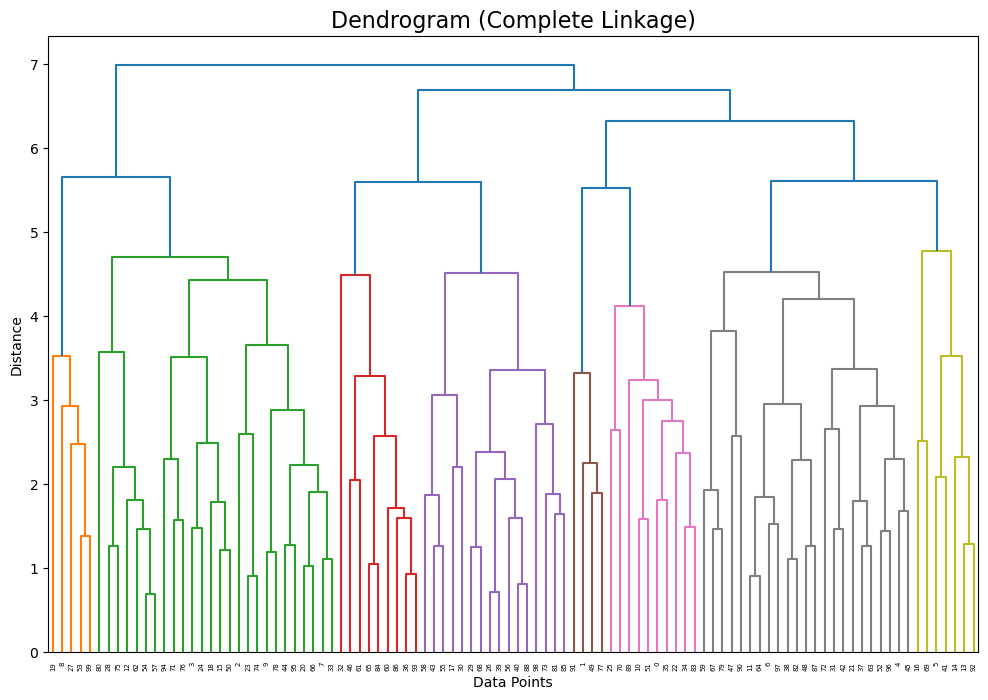

In [112]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(standardized_df, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title("Dendrogram (Complete Linkage)", fontsize=16)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Visualizing with data points

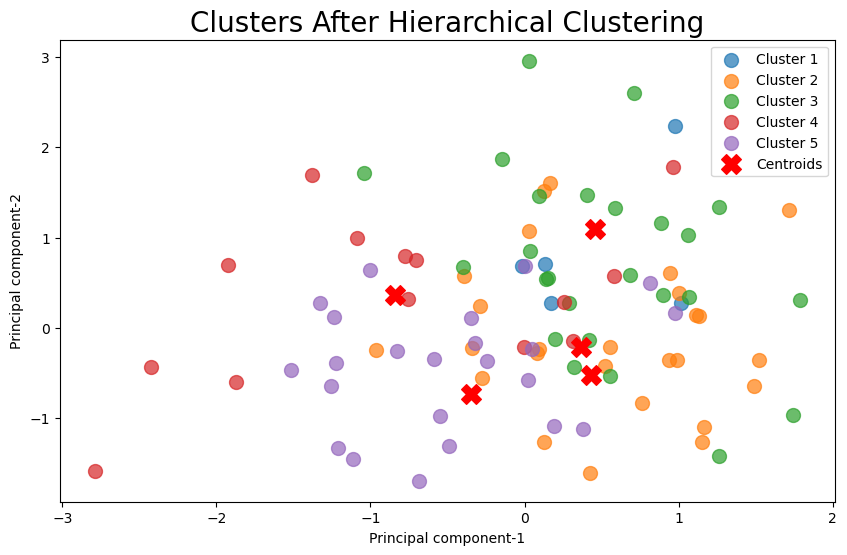

In [114]:

# Assuming 'centroids' is the array containing the centroids after convergence

# Assign data points to clusters
num_clusters = 6
cluster_labels = fcluster(Z, t=num_clusters, criterion='maxclust')

# Add the cluster labels to the 'standardized_df' DataFrame
standardized_df['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_indices = np.where(standardized_df['Cluster'] == cluster)[0]
    if len(cluster_indices) > 0:
        plt.scatter(standardized_df.iloc[cluster_indices, 0],
                    standardized_df.iloc[cluster_indices, 1],
                    label=f'Cluster {cluster}', s=100, alpha=0.7)

# Plot the centroids as markers
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title("Clusters After Hierarchical Clustering", fontsize=20)
plt.xlabel("Principal component-1")
plt.ylabel("Principal component-2")
plt.legend()
plt.show()


Part IV - PCA

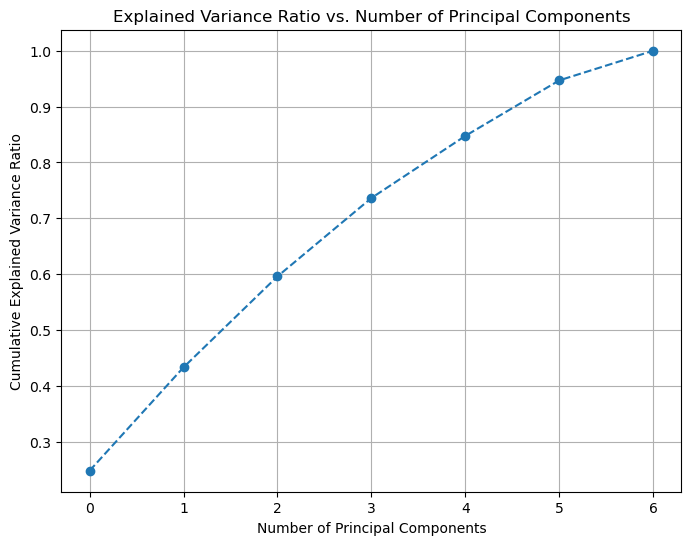

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'standardized_df' is the DataFrame containing the standardized data

# Step 1: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(standardized_df)

# Step 2: Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Step 3: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot explained variance ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid()
plt.show()


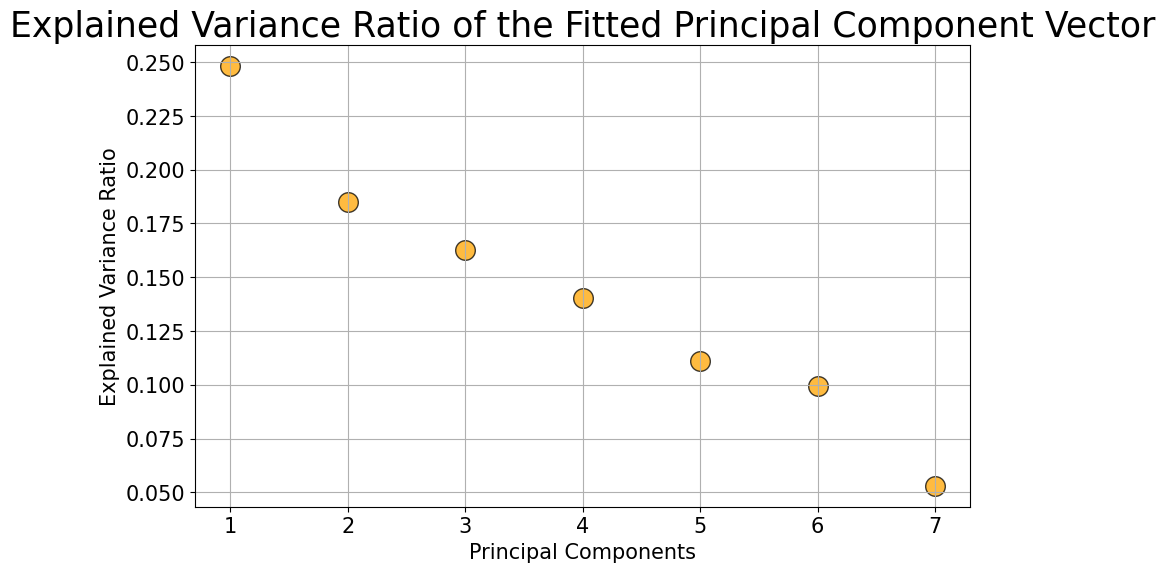

In [116]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'standardized_df' is the DataFrame containing the standardized data

# Step 1: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(standardized_df)

# Step 2: Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Step 3: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.scatter(x=[i + 1 for i in range(len(explained_variance_ratio))],
            y=explained_variance_ratio,
            s=200, alpha=0.75, c='orange', edgecolor='k')
plt.grid(True)
plt.title("Explained Variance Ratio of the Fitted Principal Component Vector", fontsize=25)
plt.xlabel("Principal Components", fontsize=15)
plt.xticks([i + 1 for i in range(len(explained_variance_ratio))], fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained Variance Ratio", fontsize=15)
plt.show()


the first principal component explains approximately 25% of the variance in the data, while the second principal component explains approximately 17.7% of the variance.

Principal components are ordered in terms of the amount of variance they explain, with the first component explaining the most variance, the second component explaining the second most, and so on. In this case, the first two principal components together explain around 42.7% of the total variance in the data.